---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
P1_Graphs

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [3]:
G1, G2, G3, G4, G5 = P1_Graphs

In [5]:
[nx.average_clustering(G) for G in P1_Graphs]

[0.03167539146454044,
 0.5642419635919628,
 0.4018222222222227,
 0.03780379975223251,
 0.0033037037037037037]

In [6]:
[nx.average_shortest_path_length(G) for G in P1_Graphs]

[4.099161161161161,
 5.089871871871872,
 9.378702269692925,
 3.1048046283934134,
 5.0785509568313305]

In [7]:
# import matplotlib.pyplot as plt
# %matplotlib notebook

<IPython.core.display.Javascript object>


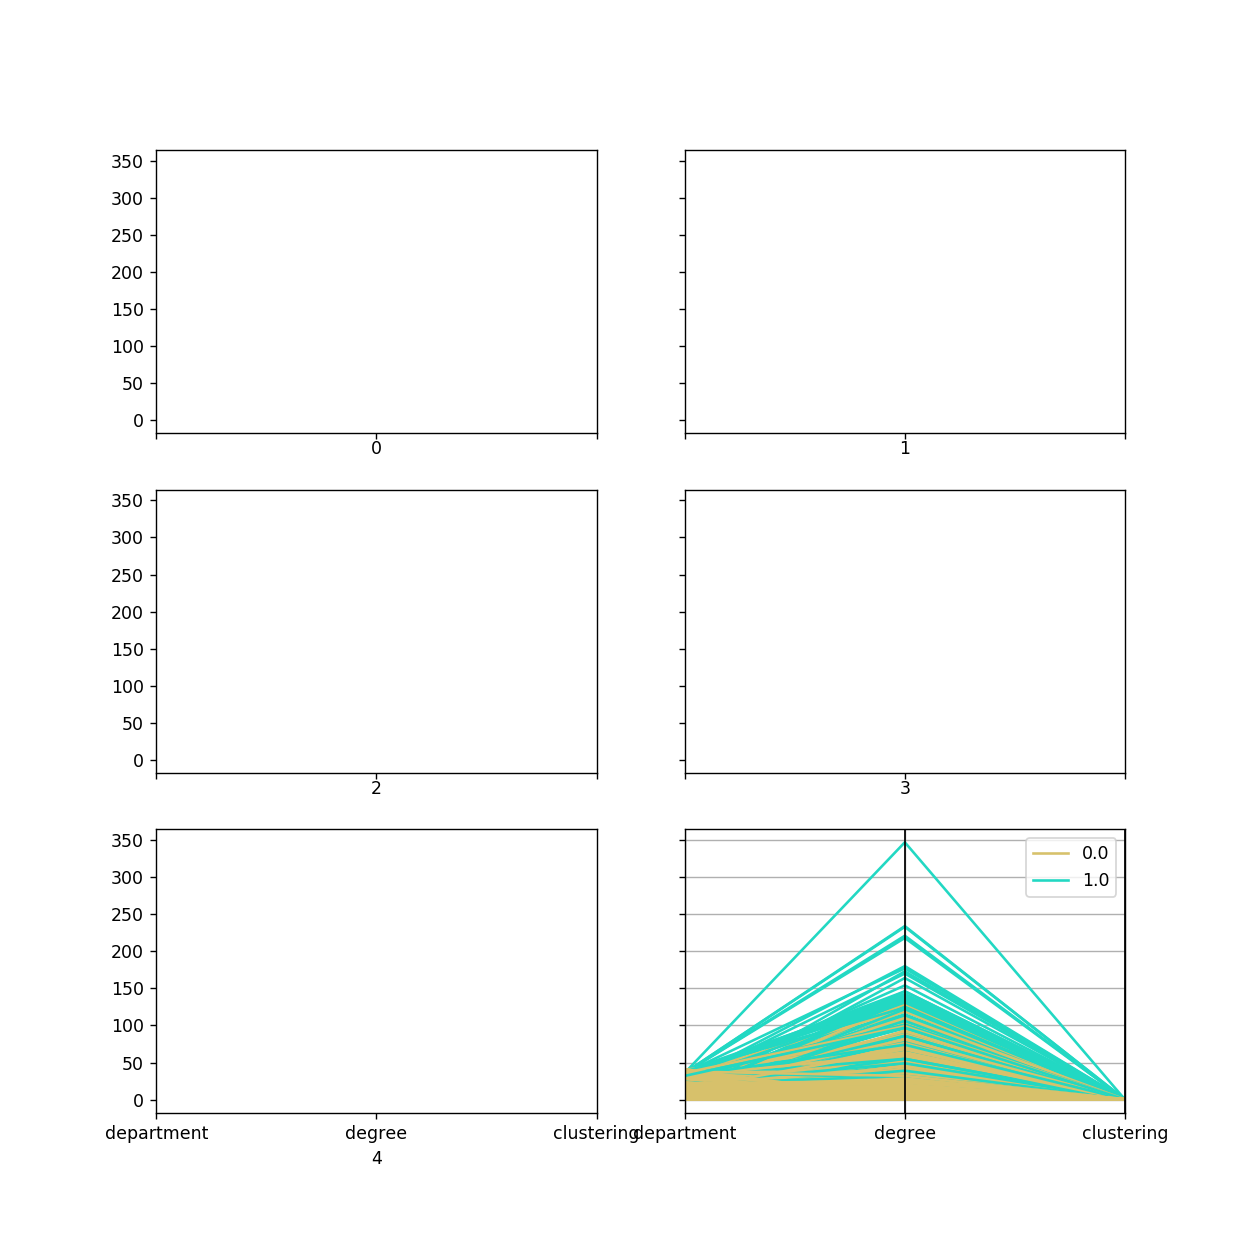

In [29]:
# fig, axs = plt.subplots(3, 2, figsize=(10, 10), sharex=True, sharey=True)
# index = 0
# for G, ax in zip(P1_Graphs, axs.ravel()):
#     degrees = G.degree()
#     degree_values = sorted(set(degrees.values()))
#     histogram  = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
#     ax.bar(degree_values, histogram)
#     ax.set_xlabel(index)
#     index += 1

In [ ]:
def graph_identification():
    
    # Your Code Here
    
    return ['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']# Your Answer Here

---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [3]:
G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [4]:
def salary_predictions():
    from sklearn.svm import SVC
    df = pd.DataFrame(index=G.nodes())
    df['department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
    df['degree'] = pd.Series(G.degree())
    df['clustering'] = pd.Series(nx.clustering(G))
    df['salary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))

    X_test = df[df['salary'].isnull()].iloc[:, :-1]
    X_train = df[df['salary'].notnull()].iloc[:, :-1]
    y_train = df[df['salary'].notnull()].iloc[:, -1]
    
    model = SVC(C=0.1, kernel='linear', probability=True)
    model.fit(X_train, y_train)
    X_test['pred'] = model.predict_proba(X_test)[:, 1] # Your Answer Here
    return X_test['pred']

In [5]:
salary_predictions()

1       0.125803
2       0.609409
5       0.970461
8       0.121927
14      0.322295
18      0.153957
27      0.258545
30      0.314550
31      0.176352
34      0.121840
37      0.111790
40      0.231909
45      0.173667
54      0.259436
55      0.203363
60      0.192314
62      0.996889
65      0.415834
77      0.061522
79      0.105515
97      0.094698
101     0.075932
103     0.173262
108     0.111146
113     0.459666
122     0.052927
141     0.424076
142     0.936055
144     0.106845
145     0.474853
          ...   
913     0.060707
914     0.080904
915     0.012651
918     0.097132
923     0.046732
926     0.084040
931     0.068614
934     0.044137
939     0.021760
944     0.016688
945     0.044789
947     0.086781
950     0.174677
951     0.056194
953     0.042005
959     0.010762
962     0.012613
963     0.149475
968     0.081056
969     0.074842
974     0.056613
984     0.042299
987     0.094598
989     0.069786
991     0.115585
992     0.011734
994     0.015936
996     0.0135

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [6]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [ ]:
# df = future_connections
# df['preferential attachment'] = [i[2] for i in nx.preferential_attachment(G, df.index)]
# df['resource_allocation'] = [i[2] for i in nx.resource_allocation_index(G, df.index)]
# df['Common Neighbors'] = df.index.map(lambda city: len(list(nx.common_neighbors(G, city[0], city[1]))))
# X_test = df[df['Future Connection'].isnull()].iloc[:, 1:]
# X_train = df[df['Future Connection'].notnull()].iloc[:, 1:]
# y_train = df[df['Future Connection'].notnull()].iloc[:, 0]


In [23]:
# X_test

,preferential attachment,resource_allocation,Common Neighbors
"(107, 348)",884,0.025562,2
"(542, 751)",126,0.000000,0
"(20, 426)",4440,0.082016,10
"(50, 989)",68,0.000000,0
"(942, 986)",6,0.000000,0
"(324, 857)",76,0.000000,0
"(13, 710)",3600,0.111676,6
"(19, 271)",5040,0.050306,6
"(319, 878)",48,0.000000,0
"(659, 707)",120,0.000000,0


In [39]:
def new_connections_predictions():
    from sklearn.linear_model import LogisticRegression
    df = future_connections
    df['preferential attachment'] = [i[2] for i in nx.preferential_attachment(G, df.index)]
    df['resource_allocation'] = [i[2] for i in nx.resource_allocation_index(G, df.index)]
    df['Common Neighbors'] = df.index.map(lambda city: len(list(nx.common_neighbors(G, city[0], city[1]))))
    
    X_test = df[df['Future Connection'].isnull()].iloc[:, 1:]
    X_train = df[df['Future Connection'].notnull()].iloc[:, 1:]
    y_train = df[df['Future Connection'].notnull()].iloc[:, 0]
    
    model = LogisticRegression(C=10, penalty='l2')
    model.fit(X_train, y_train)
    X_test['pred'] = model.predict_proba(X_test)[:, 1]# Your Answer Here
    return X_test['pred']

In [40]:
#new_connections_predictions()

(107, 348)    0.038499
(542, 751)    0.014613
(20, 426)     0.640972
(50, 989)     0.014892
(942, 986)    0.015196
(324, 857)    0.014853
(13, 710)     0.164282
(19, 271)     0.108509
(319, 878)    0.014990
(659, 707)    0.014642
(49, 843)     0.015078
(208, 893)    0.014709
(377, 469)    0.006412
(405, 999)    0.026900
(129, 740)    0.022646
(292, 618)    0.023337
(239, 689)    0.015009
(359, 373)    0.009131
(53, 523)     0.040038
(276, 984)    0.015063
(202, 997)    0.015122
(604, 619)    0.049894
(270, 911)    0.015004
(261, 481)    0.079916
(200, 450)    0.857422
(213, 634)    0.014528
(644, 735)    0.049068
(346, 553)    0.013852
(521, 738)    0.012617
(422, 953)    0.022191
                ...   
(672, 848)    0.015004
(28, 127)     0.972444
(202, 661)    0.013740
(54, 195)     0.999926
(295, 864)    0.014810
(814, 936)    0.014570
(839, 874)    0.015196
(139, 843)    0.014834
(461, 544)    0.011804
(68, 487)     0.011665
(622, 932)    0.014742
(504, 936)    0.019061
(479, 528) 